# Physics Applications Part 1



## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### 1. More practice using complex numbers in Python.


#### a)

$$\begin{align}
z=\\
&=\frac{a+ib}{c+id}\\
&=\frac{a+ib}{c+id}×\frac{c-id}{c-id}\\
&=\frac{ac-iad+icb-i^2db}{c^2+-i^2d^2}\\
&=\frac{(ac-db)+i(cb-ad)}{c^2+d^2}\\
&⟹ x=\frac{(ac+db)}{c^2+d^2}\\
&⟹y=\frac{i(cb-ad)}{c^2+d^2}
\end{align}$$

#### b)

In [2]:
a=3
b=4
c=5
d=6

z1=(a+1j*b)/(c+1j*d)
x = (a*c+d*b)/(c**2+d**2)
y = (1j*c*b-1j*a*d)/(c**2+d**2)
z2=x+y
print(f'Z1={z1}\nZ2={z2}')

Z1=(0.6393442622950819+0.03278688524590165j)
Z2=(0.639344262295082+0.03278688524590164j)


#### c)

$$\begin{align}
e^{2i}=\cos{2}+i\sin{2}\\
\cos{3i}=\frac{e^{3i}+e^{-3i}}{2}
\end{align}$$

In [3]:
e2i = np.cos(2)+1j*np.sin(2)
cos3i = (np.exp(1j*3*1j)+np.exp(-1j*3*1j))/2


print(f'e^2j: {np.exp(2j)} = {e2i}')
print(f'cos(3j): {np.cos(3j)} = {cos3i}')

e^2j: (-0.4161468365471424+0.9092974268256817j) = (-0.4161468365471424+0.9092974268256817j)
cos(3j): (10.067661995777765-0j) = (10.067661995777765+0j)


### 2. Euler’s formula with complex arguments

$z=x+iy$
$f(t)=e^{izt}$
$e^{iz}=\cos{z}+i\sin{z}$

#### a)

In [4]:
def f(t,x,y):
  z = x+1j*y
  e = np.exp(1j*z*t)
  return e

#### b)

[0.000e+00 1.000e-02 2.000e-02 ... 1.097e+01 1.098e+01 1.099e+01]


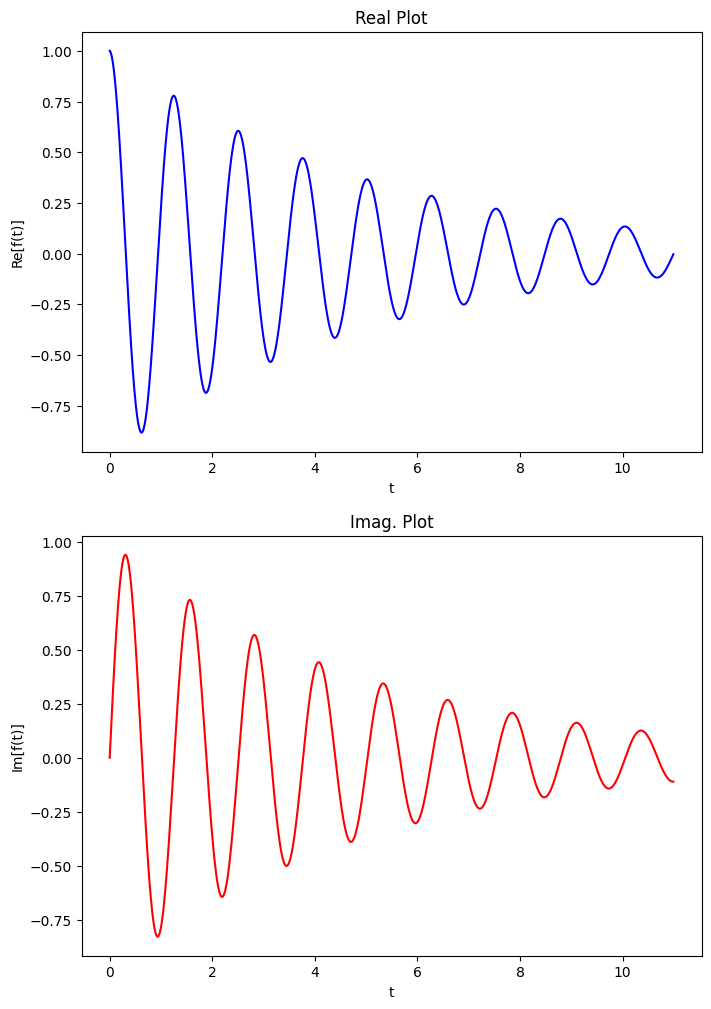

In [5]:
x=5.0
y=0.2
t = np.arange(0, 11,.01)
print(t)
data = f(t,x,y)
f.real = data.real
f.imag = data.imag

plt.figure(figsize=(8,12))
plt.rc('font', size=10)

plt.subplot(211)
plt.plot(t,f.real, 'b-')
plt.title('Real Plot')
plt.xlabel('t')
plt.ylabel('Re[f(t)]')
plt.subplot(212)
plt.title('Imag. Plot')
plt.xlabel('t')
plt.ylabel('Im[f(t)]')
plt.plot(t,f.imag, 'r-')

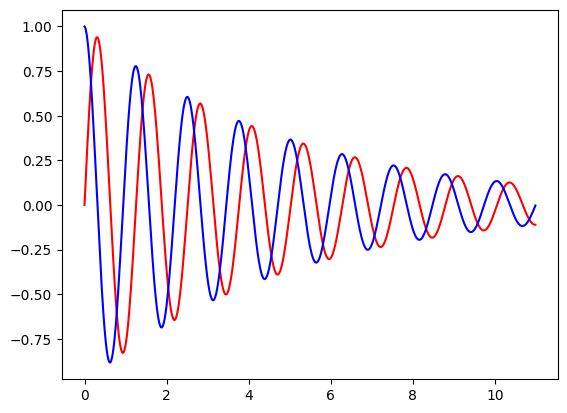

In [6]:
plt.plot(t,f.imag, 'r-')
plt.plot(t,f.real, 'b-')

#### c)

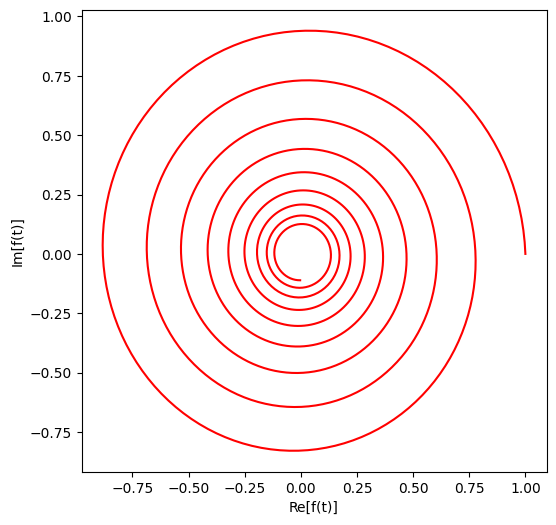

In [7]:
plt.figure(figsize=(6,6))
plt.rc('font', size=10)
plt.title('')
plt.xlabel('Re[f(t)]')
plt.ylabel('Im[f(t)]')
plt.plot(f.real,f.imag, 'r-')

Their appearance is shaped by the fact that one lies along the imaginary axis while the other resides on the real axis. Additionally, they differ in scale, contributing to their distinct forms.

### 3. Use complex numbers to analyze an AC circuit.

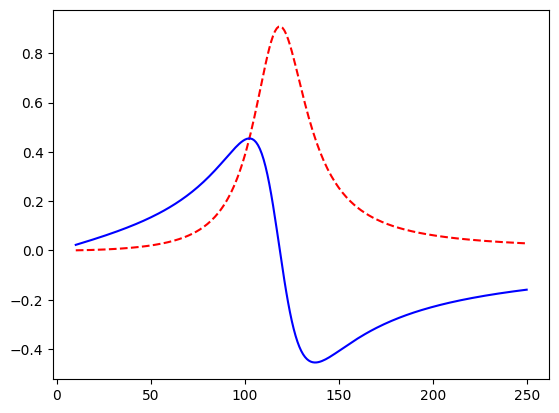

In [8]:
def omega(f):
  return f*2*np.pi

f = np.arange(10, 251, 1, dtype=int)
R=33
L=150.0*10.0**(-6.0)
C=12.0*10.0**(-9.0)
V=30.0
Z_L=1j*omega(f*1000)*L
Z_C=1.0/(1j*omega(f*1000)*C)
Z_t = R + Z_L + Z_C
I = V/Z_t

Re = I.real
Im = I.imag

plt.plot(f,Re,'r--')
plt.plot(f,Im,'b-')

### 4. Plotting the Mandelbrot Set (Newman 3.7) 

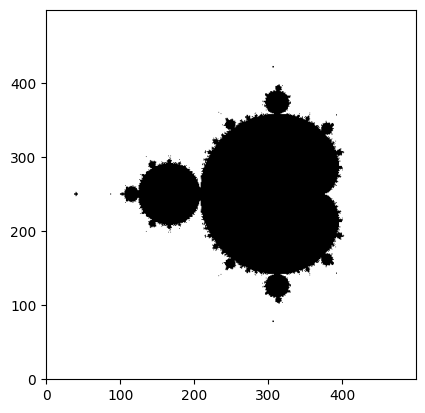

In [9]:
from pylab import imshow,show,gray
def f(N,nmax):
  xvals = np.linspace(-2,1,N)
  yvals = np.linspace(-1.5,1.5,N)
  zero_arr = np.zeros([N,N],int)


  for n,x in enumerate(xvals):
    for m,y in enumerate(yvals):
      C=0+0j
      z=complex(x,y)
      for l in range(nmax):
        C=C*C+z
        if abs(C)>4.0:
          zero_arr[m,n]=1
          break
  imshow(zero_arr,origin='lower')
  gray()
  show()

f(500,100)  


### 6. Numerical integration: Error functions

#### a)

In [10]:
from scipy.integrate import quad

def Erf(x):
  function = np.exp(-x**2)
  return function
x_arr = np.linspace(0,3, 7)

def integral(x):
  f = quad(Erf,0,x)[0]
  return f 

print(Erf(x))
return_val = [integral(x) for x in x_arr] 
print(return_val)


1.3887943864964021e-11
[0.0, 0.46128100641279246, 0.7468241328124271, 0.8561883936249011, 0.8820813907624215, 0.885866273617531, 0.8862073482595214]


#### b)

ValueError: ignored

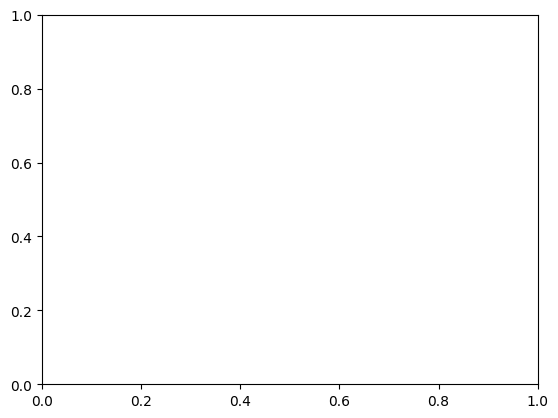

In [11]:
plt.plot(x,return_val)     
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.show()

### 7. Numerical integration

In [ ]:
from scipy.special import ellipe

def E(t):
  m=0.9999
  return (1-m*np.sin(t)**2.0)**0.5

a=0
b=np.pi/2
N=int(input(f'Enter 10,100, or 1000: '))
h=(b-a)/N



# trapezoid ---------------------------------------------------------
E_int = 0.5*h*(E(a) + E(b))

for i in range(1,N):
    E_int += h* E(a + i*h)           
    
# Simpson's ---------------------------------------------------------
    E_simp = h*(E(a) + E(b))/3          #covers terms 0 and N (endpoints)

for i in range(1,N,2):                     #covers terms 1,3,5,...N-1
    E_simp += h*4*E(a + i*h)/3

for i in range(2,N-1,2):                   #covers terms 2,4,6,...N-2
    E_simp += h*2*E(a + i*h)/3

print(f'Exact = {ellipe(0.9999)}')
print('Trapezoidal:', E_int)
print('Simpsons:  ', E_simp)
print('quad:     ',quad(E,a,b)[0])

Based on the calculations of N=10,100,1,000

8. Newman 5.9 (p. 172): Heat capacity of a solid.

C_v: [3097.4854572655768, 85350.52090146173, 396676.70093650627, 1083530.5385556235, 2229618.3108354732, 3778394.4671006612, 5568041.949067364, 7426749.925721588, 9227838.546846826, 10897946.54651995, 12404767.112887388, 13741946.190515395, 14917377.636276092, 15945617.583602063, 16843460.984315857, 17627578.42709425, 18313382.172045685, 18914581.529586654, 19443102.668478988, 19909186.621330034, 20321562.897283576, 20687644.550653122, 21013717.78948367, 21305114.10743358, 21566360.810858276, 21801309.79270087, 22013246.248697486, 22204979.738436766, 22378920.11943838, 22537140.730723415, 22681430.936250903, 22813339.84244425, 22934212.719037134, 23045221.396552373, 23147389.69262623, 23241614.732761707, 23328684.875842452, 23409294.826773457, 23484058.413743835, 23553519.421948597, 23618160.805762544, 23678412.544437397, 23734658.359988056, 23787241.478066113, 23836469.581671152, 23882619.082216654, 23925938.811683793, 23966653.222510256, 24004965.167780794, 24041058.322654497]
T: [  

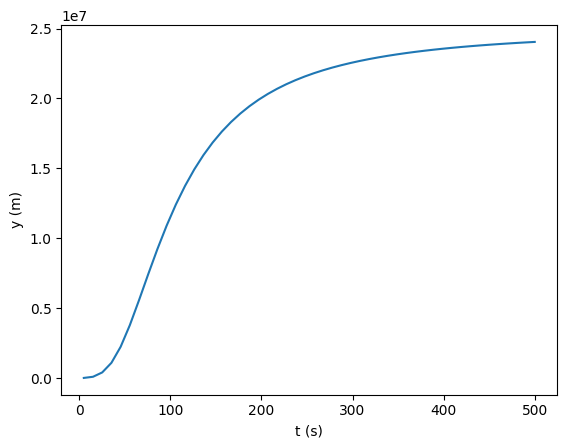

In [13]:
from scipy.integrate import quad
rho=6.022e28
theta_D=428 #154.85C 310.73F
k_B=1.380*10**-23 
V= 10
T=np.linspace(5,500)
x_arr = np.linspace(0,theta_D/T)



def integral(x):
  return (x**4*np.exp(x)/(np.exp(x)-1)**2)  


def debye(x): 
  return quad(integral,0,theta_D/x)[0]


C_v = [9*V*rho*k_B*(x/theta_D)**3*debye(x) for x in T]   
print(f'C_v: {C_v}\nT: {T}')
print(f'X: {x}\nC_v: {C_v}')
print(f'C_v: {np.shape(C_v)}\nT: {np.shape(T)}')
plt.plot(T,C_v)     
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.show()